In [1]:
# Packages
library(ggplot2)  # visualization
library(dplyr)    # data manipulation
library(tidyr)    # reshape and clean data
library(forcats)  # working with factors


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Read the dataset and load it to a data frame
file_path <- "/content/CreditCardFraud_Dataset-4.csv"
df <- read.csv(file_path)
# Data transformations
df$MerchantID <- as.factor(df$MerchantID)         # Ensures proper grouping in plots/summaries
df$TransactionType <- as.factor(df$TransactionType)  # So ggplot doesn't treat it as text
df$Class <- factor(df$Class, levels = c("Normal", "Fraudulent"))  # So "Fraudulent" is the positive class

In [3]:
# Merchant-Level Summary: Fraudulent vs Normal Transactions with Fraud Rate (%)
merchant_class_summary <- df %>%
  group_by(MerchantID, Class) %>%
  summarise(TransactionCount = n(), .groups = "drop") %>%
  pivot_wider(
    names_from = Class,
    values_from = TransactionCount,
    names_prefix = "Class_",
    values_fill = list(TransactionCount = 0)
  ) %>%
  mutate(
    Total = Class_Fraudulent + Class_Normal,
    FraudRate = round(100 * Class_Fraudulent / Total, 2)
  ) %>%
  arrange(desc(FraudRate))
print(merchant_class_summary)

# A tibble: 100 × 5
   MerchantID Class_Normal Class_Fraudulent Total FraudRate
   <fct>             <int>            <int> <int>     <dbl>
 1 M17                  96                7   103      6.8 
 2 M85                  83                5    88      5.68
 3 M2                   93                5    98      5.1 
 4 M58                  93                5    98      5.1 
 5 M75                 116                6   122      4.92
 6 M15                  99                5   104      4.81
 7 M29                 101                5   106      4.72
 8 M3                  103                5   108      4.63
 9 M66                  86                4    90      4.44
10 M90                  88                4    92      4.35
# ℹ 90 more rows


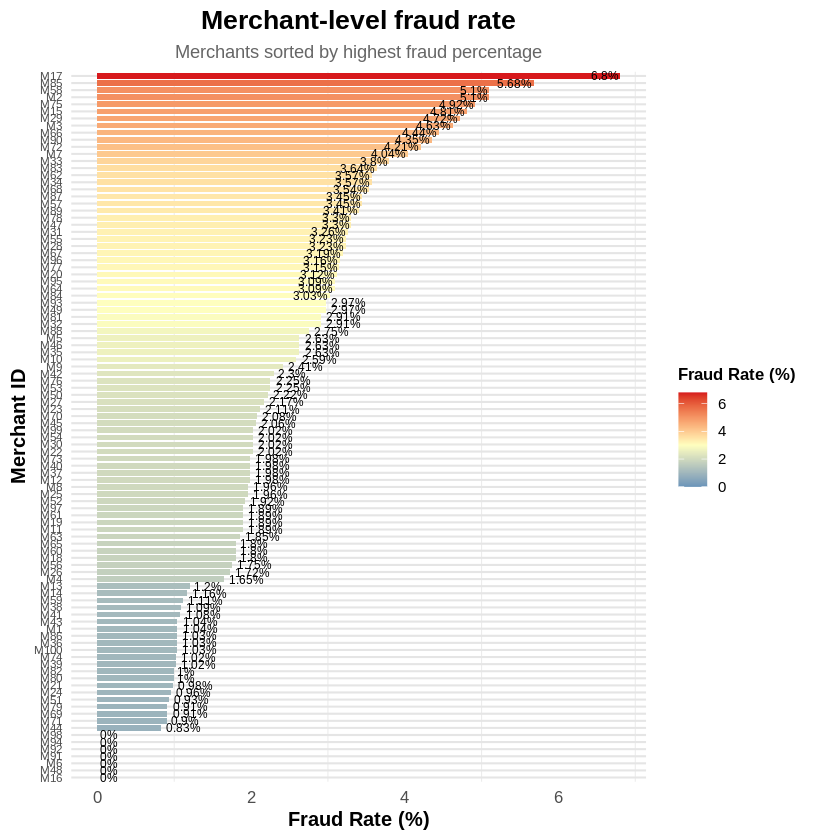

In [4]:
ggplot(merchant_class_summary, aes(x = reorder(MerchantID, FraudRate), y = FraudRate, fill = FraudRate)) +
  geom_col(width = 0.8) +
  geom_text(
    aes(label = paste0(FraudRate, "%")),
    hjust = ifelse(merchant_class_summary$FraudRate > 3, 1.05, -0.15),
    color = "black",
    size = 2.5
  ) +
  # Improved color perception
  scale_fill_gradient2(
    low = "#2c7bb6", mid = "#ffffbf", high = "#d7191c",
    midpoint = 3, name = "Fraud Rate (%)"
  ) +
  coord_flip() +
  labs(
    title = "Merchant-level fraud rate",
    subtitle = "Merchants sorted by highest fraud percentage",
    x = "Merchant ID",
    y = "Fraud Rate (%)"
  ) +
  theme_minimal(base_size = 13) +
theme(
  plot.title = element_text(face = "bold", size = 16, hjust = 0.5),
  plot.subtitle = element_text(size = 11, color = "gray40", hjust = 0.5),
  axis.title.x = element_text(size = 12, face = "bold"),
  axis.title.y = element_text(size = 12, face = "bold"),
  axis.text.x = element_text(size = 10),
  axis.text.y = element_text(size = 7),
  legend.title = element_text(size = 10, face = "bold"),
  legend.text = element_text(size = 9),
  legend.key.height = unit(0.4, "cm"),
  panel.grid.major.y = element_line(color = "gray90"),
  panel.grid.major.x = element_blank()
)

`geom_smooth()` using formula = 'y ~ x'


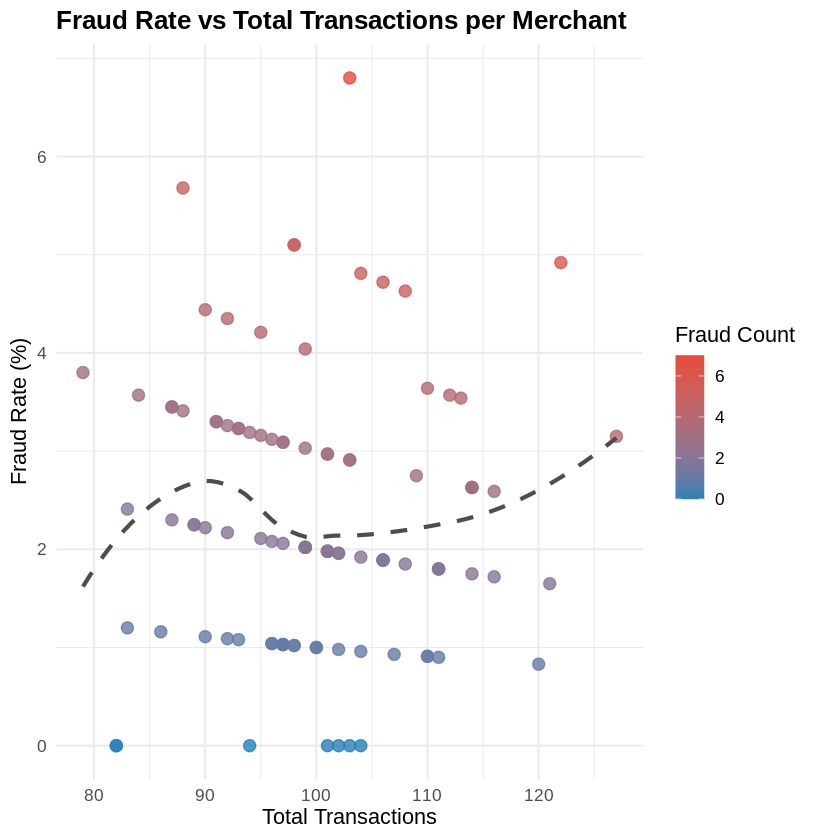

In [5]:
ggplot(merchant_class_summary, aes(x = Total, y = FraudRate, color = Class_Fraudulent)) +
  geom_point(size = 3, alpha = 0.8) +
  scale_color_gradient(low = "#2980B9", high = "#E74C3C") +
  geom_smooth(method = "loess", se = FALSE, color = "gray30", linetype = "dashed") +
  labs(
    title = "Fraud Rate vs Total Transactions per Merchant",
    x = "Total Transactions",
    y = "Fraud Rate (%)",
    color = "Fraud Count"
  ) +
  theme_minimal(base_size = 13) +
  theme(
    plot.title = element_text(face = "bold"),
    legend.position = "right"
  )